In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

11490434/11490434 [==============================] - 40s 3us/step


In [4]:

y_test.shape, y_train.shape

((10000,), (60000,))

In [5]:
x_test.shape, x_train.shape

((10000, 28, 28), (60000, 28, 28))

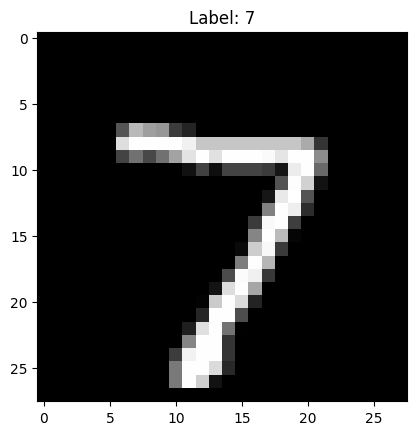

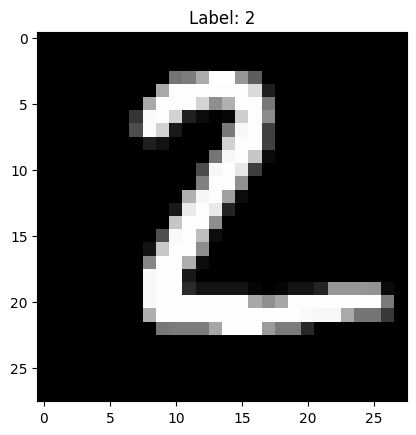

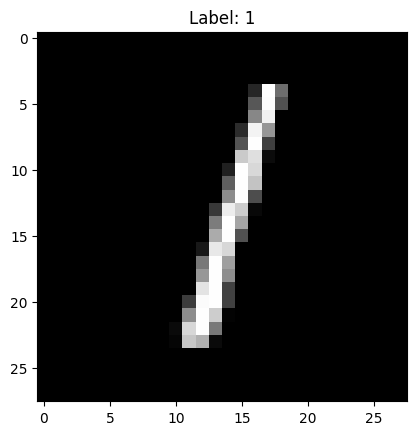

In [6]:
for i in range(3):
    plt.title(f'Label: { y_test[i]}')
    plt.imshow(x_test[i], cmap='gray')
    plt.show()

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [8]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Output layer with Softmax activation.
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)        

In [12]:
sample = x_test[2]
sample = np.expand_dims(sample, 0)
sample.shape

(1, 28, 28)

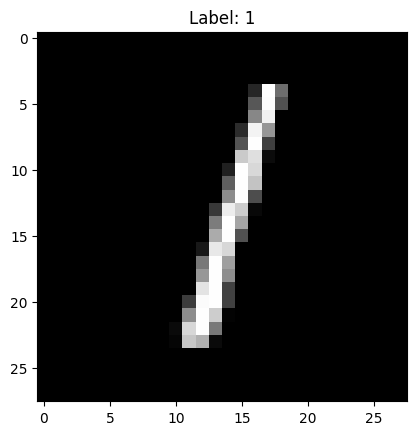

In [13]:
plt.title(f'Label: { y_test[2]}')
plt.imshow(x_test[2], cmap='gray')
plt.show()

In [14]:
pred_b4_training = model.predict(sample)
print(pred_b4_training)
print('\n Prediction before Training:', np.argmax(pred_b4_training))

1/1 [==============================] - 0s 24ms/step
[[0.09785186 0.09525967 0.10136324 0.10009407 0.09952544 0.10009515
  0.10297885 0.10008796 0.09945624 0.10328757]]

 Prediction before Training: 9


In [15]:
sum(np.array(pred_b4_training)[0])


1.0000000521540642

In [16]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [19]:
hist = model.fit(x_train, y_train, epochs = 50)

Epoch 1/50

1875/1875 [==============================] - 9s 5ms/step - loss: 0.6796 - sparse_categorical_accuracy: 0.7914
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2495 - sparse_categorical_accuracy: 0.9257
Epoch 3/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1928 - sparse_categorical_accuracy: 0.9430
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1588 - sparse_categorical_accuracy: 0.9525
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1399 - sparse_categorical_accuracy: 0.9586
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1259 - sparse_categorical_accuracy: 0.9634
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1152 - sparse_categorical_accuracy: 0.9657
Epoch 8/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1052 - sparse_categorical_accuracy: 0.9682
Epoch 9/50
1875/1875 [=========

In [20]:
pred_after_training = model.predict(sample)
print(pred_after_training)
print('\n Prediction after Training:', np.argmax(pred_after_training))

1/1 [==============================] - 0s 74ms/step
[[5.0394082e-08 9.9999082e-01 2.0165805e-07 6.6490986e-09 4.1219319e-06
  2.7902945e-06 1.1481274e-06 3.6584890e-07 5.6070320e-07 7.0566442e-09]]

 Prediction after Training: 1


In [21]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 0s 4ms/step - loss: 0.0419 - sparse_categorical_accuracy: 0.9896
test loss, test acc: [0.04193343594670296, 0.9896000027656555]


In [22]:

model.save("handDigitsCNN.h5")

c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
